# Análise de dados - FIES
*by: Alexandre Rodrigues* 

O [Fundo de Financiamento Estudantil (FIES)](https://sisfiesportal.mec.gov.br/) é um projeto criado pelo governo federal em meados de 1999 como um programa vinculado ao Ministério da Educação (MEC). 

O intuito do programa é viabilizar o ingresso ao ensino superior através do financiamento da graduação para os estudantes que não tem condições de pagar as mensalidades de faculdades privadas.

Como se trata de um programa que fornece um financiamento estudantil, ao final do curso, o estudante que obteve o benefício deve pagar a dívida.

<center><img alt="Analisando FIES" width="50%" src="fies.png"></center>

## Análise Exploratória de Dados (AED)

`1. Data Source:` Destinada ao carregamento dos dados e carregamento das bibliotecas que serão utilizadas.

`2. Data Cleaning:` Aqui será realizado o tratamento dos dados, verificação de outlier, dados nulos, corrigindo formatos, etc.

`3. Análise de dados demográficos: ` Análise dos dados demográficos com intuito de entender o perfil de quem solicita o financiamento estudantil(FIES).

`4. Conclusão: `

## Fonte dos dados
http://dadosabertos.mec.gov.br/fies/item/148-2021-relatorio-fies-inscricoes-2-2021

# Data Source

In [166]:
#carregando as bibliotecas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



In [167]:
fies = pd.read_csv('relatorio_inscricao_dados_abertos_fies_22021.csv',sep=';', encoding='latin-1')

In [168]:
fies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237965 entries, 0 to 237964
Data columns (total 57 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Ano do processo seletivo        237965 non-null  int64  
 1   Semestre do processo seletivo   237965 non-null  int64  
 2   ID do estudante                 237965 non-null  int64  
 3   Sexo                            237965 non-null  object 
 4   Data de Nascimento              237965 non-null  object 
 5   UF de residência                237965 non-null  object 
 6   Municipio de residência         237965 non-null  object 
 7   Etnia/Cor                       237965 non-null  object 
 8   Pessoa com deficiência?         237965 non-null  object 
 9   Tipo de escola no ensino médio  237965 non-null  object 
 10  Ano conclusão ensino médio      237965 non-null  int64  
 11  Concluiu curso superior?        237965 non-null  object 
 12  Professor rede p

In [169]:
print(f'O número de linhas do dataset é {fies.shape[0]}.')
print(f'O data set contém {fies.shape[1]} colunas.')

O número de linhas do dataset é 237965.
O data set contém 57 colunas.


In [170]:
fies.columns

Index(['Ano do processo seletivo', 'Semestre do processo seletivo',
       'ID do estudante', 'Sexo', 'Data de Nascimento', 'UF de residência',
       'Municipio de residência', 'Etnia/Cor', 'Pessoa com deficiência?',
       'Tipo de escola no ensino médio', 'Ano conclusão ensino médio',
       'Concluiu curso superior?', 'Professor rede pública ensino?',
       'Nº de membros Grupo Familiar', 'Renda familiar mensal bruta',
       'Renda mensal bruta per capita', 'Região grupo de preferência', 'UF',
       'Cod.Microrregião', 'Microrregião', 'Cod.Mesorregião', 'Mesorregião',
       'Conceito de curso do GP', 'Área do conhecimento',
       'Subárea do conhecimento', 'Cod. do Grupo de preferência',
       'Nota Corte Grupo Preferência', 'Opções de cursos da inscrição',
       'Nome mantenedora', 'Natureza Jurídica Mantenedora',
       'CNPJ da mantenedora', 'Código e-MEC da Mantenedora', 'Nome da IES',
       'Código e-MEC da IES', 'Organização Acadêmica da IES',
       'Município da IES

In [171]:
dataset = fies[['Sexo', 'Etnia/Cor','Pessoa com deficiência?', 'Tipo de escola no ensino médio', 'Renda familiar mensal bruta', 'Renda mensal bruta per capita', 'Nome do curso', 'Turno', 'Média nota Enem', 'Situação Inscrição Fies']]

Como vou querer realisar uma análise demográfica, é melhor eu filtrar as colunas que tenho maior interesse.

In [172]:
print(f'Após o filtro o número de linhas é {dataset.shape[0]}.')
print(f'Após o filtro o número de colunas é {dataset.shape[1]}.')

Após o filtro o número de linhas é 237965.
Após o filtro o número de colunas é 10.


In [173]:
display(dataset.head())
display(dataset.tail())

,Sexo,Etnia/Cor,Pessoa com deficiência?,Tipo de escola no ensino médio,Renda familiar mensal bruta,Renda mensal bruta per capita,Nome do curso,Turno,Média nota Enem,Situação Inscrição Fies
0,M,PARDA,NÃO,SIM,"4253,03","1417,68",DIREITO,NOTURNO,"624,1",NÃO CONTRATADO
1,M,PARDA,NÃO,SIM,"4253,03","1417,68",DIREITO,MATUTINO,"624,1",NÃO CONTRATADO
2,M,BRANCA,NÃO,NÃO,NaN,1600,DIREITO,NOTURNO,"701,82",PARTICIPACAO CANCELADA PELO CANDIDATO
3,M,BRANCA,NÃO,SIM,"1574,07","787,04",DIREITO,MATUTINO,"598,54",OPÇÃO NÃO CONTRATADA
4,F,BRANCA,NÃO,SIM,2500,"833,33",DIREITO,NOTURNO,"512,16",NÃO CONTRATADO


,Sexo,Etnia/Cor,Pessoa com deficiência?,Tipo de escola no ensino médio,Renda familiar mensal bruta,Renda mensal bruta per capita,Nome do curso,Turno,Média nota Enem,Situação Inscrição Fies
237960,M,BRANCA,NÃO,SIM,1300,"433,33",ENGENHARIA DA COMPUTAÇÃO,NOTURNO,"570,6",NÃO CONTRATADO
237961,F,PRETA,NÃO,NÃO,NaN,1100,ENGENHARIA DE PRODUÇÃO,NOTURNO,"500,9",NÃO CONTRATADO
237962,M,BRANCA,NÃO,NÃO,"5922,44","2961,22",ENGENHARIA DE PRODUÇÃO,NOTURNO,"640,08",PRÉ-SELECIONADO
237963,F,PARDA,NÃO,SIM,"6517,59","1629,4",PSICOLOGIA,NOTURNO,"535,16",PARTICIPACAO CANCELADA PELO CANDIDATO
237964,F,PARDA,NÃO,SIM,"1200,5","400,17",PEDAGOGIA,NOTURNO,"549,94",PARTICIPACAO CANCELADA PELO CANDIDATO


In [174]:
dataset.dtypes

Sexo                              object
Etnia/Cor                         object
Pessoa com deficiência?           object
Tipo de escola no ensino médio    object
Renda familiar mensal bruta       object
Renda mensal bruta per capita     object
Nome do curso                     object
Turno                             object
Média nota Enem                   object
Situação Inscrição Fies           object
dtype: object

Os dados possuem algumas inconsitências, primeiramente podemos notar a presença de Missing Values na nossa base de dados. Além disso, temos o tipo de dado errado para as colunas *Renda familiar mensal bruta*, *Renda mensal bruta per capita* e *Média nota Enem* que estão classificadas como objeto quando deveriam estar como float, e, por fim, os dados dessas colunas mencionadas anteriormente estão separados por *virgula* e não por *ponto* como deveria ser.

# Data Cleaning

In [175]:
colunas = ['Renda familiar mensal bruta','Renda mensal bruta per capita','Média nota Enem']
dataset[colunas] = dataset[colunas].applymap(lambda x: str(x).replace(',','.'))

c:\Users\nrodr\anaconda3\envs\fies_AED\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


O código acima tem o objetivo de tratar a inconsistência do separador, para poder realizar as analises de forma correta devemos trocar a virgula para o ponto.

Então, eu crio uma lista *colunas* e passo como argumento dessa lista as colunas que estão com essa inconsistência, após isso, utilizo a função applymap() junto com a função anônima lambda para aplicar em todas as linhas das colunas da minha lista a função replace() para trocas todas virgulas por ponto.

In [176]:
dataset = dataset.astype({
    'Renda familiar mensal bruta': 'float',
    'Renda mensal bruta per capita': 'float',
    'Média nota Enem': 'float'
})

Agora, realizei o tratamento referente ao tipo dos dados convertendo object -> float para poder realizar as analises posteriores de forma correta

In [177]:
display(dataset.head())
display(dataset.tail())
display(dataset.dtypes)

,Sexo,Etnia/Cor,Pessoa com deficiência?,Tipo de escola no ensino médio,Renda familiar mensal bruta,Renda mensal bruta per capita,Nome do curso,Turno,Média nota Enem,Situação Inscrição Fies
0,M,PARDA,NÃO,SIM,4253.03,1417.68,DIREITO,NOTURNO,624.10,NÃO CONTRATADO
1,M,PARDA,NÃO,SIM,4253.03,1417.68,DIREITO,MATUTINO,624.10,NÃO CONTRATADO
2,M,BRANCA,NÃO,NÃO,NaN,1600.00,DIREITO,NOTURNO,701.82,PARTICIPACAO CANCELADA PELO CANDIDATO
3,M,BRANCA,NÃO,SIM,1574.07,787.04,DIREITO,MATUTINO,598.54,OPÇÃO NÃO CONTRATADA
4,F,BRANCA,NÃO,SIM,2500.00,833.33,DIREITO,NOTURNO,512.16,NÃO CONTRATADO


,Sexo,Etnia/Cor,Pessoa com deficiência?,Tipo de escola no ensino médio,Renda familiar mensal bruta,Renda mensal bruta per capita,Nome do curso,Turno,Média nota Enem,Situação Inscrição Fies
237960,M,BRANCA,NÃO,SIM,1300.00,433.33,ENGENHARIA DA COMPUTAÇÃO,NOTURNO,570.60,NÃO CONTRATADO
237961,F,PRETA,NÃO,NÃO,NaN,1100.00,ENGENHARIA DE PRODUÇÃO,NOTURNO,500.90,NÃO CONTRATADO
237962,M,BRANCA,NÃO,NÃO,5922.44,2961.22,ENGENHARIA DE PRODUÇÃO,NOTURNO,640.08,PRÉ-SELECIONADO
237963,F,PARDA,NÃO,SIM,6517.59,1629.40,PSICOLOGIA,NOTURNO,535.16,PARTICIPACAO CANCELADA PELO CANDIDATO
237964,F,PARDA,NÃO,SIM,1200.50,400.17,PEDAGOGIA,NOTURNO,549.94,PARTICIPACAO CANCELADA PELO CANDIDATO


Sexo                               object
Etnia/Cor                          object
Pessoa com deficiência?            object
Tipo de escola no ensino médio     object
Renda familiar mensal bruta       float64
Renda mensal bruta per capita     float64
Nome do curso                      object
Turno                              object
Média nota Enem                   float64
Situação Inscrição Fies            object
dtype: object

Podemos ver que agora nossos dados estão nos formatos que eu preciso para poder realizar o resto das análises, porém ainda temos os missing values.

Temos alguns tipos de missing values
1. Missing completely values: Esses são quando os valores não dependem de nenhuma outra feature.
2. Missing at random: São quando os valores dependem de alguma feature.
3. Missing not at random: Esses os valores nulos tem alguma razão para estarem assim.

De acordo com os tipos principais, nossos dados entram no primeiro tipo, Missing Completely Values e portanto não dependem de nenhuma feature

In [178]:
dataset.isnull().sum()

Sexo                                  0
Etnia/Cor                             0
Pessoa com deficiência?               0
Tipo de escola no ensino médio        0
Renda familiar mensal bruta       30275
Renda mensal bruta per capita         0
Nome do curso                         0
Turno                                 0
Média nota Enem                       0
Situação Inscrição Fies               0
dtype: int64

## Porcentagem de missing values

In [179]:
dataset.isnull().sum()/dataset.shape[0]

Sexo                              0.000000
Etnia/Cor                         0.000000
Pessoa com deficiência?           0.000000
Tipo de escola no ensino médio    0.000000
Renda familiar mensal bruta       0.127225
Renda mensal bruta per capita     0.000000
Nome do curso                     0.000000
Turno                             0.000000
Média nota Enem                   0.000000
Situação Inscrição Fies           0.000000
dtype: float64

In [180]:
#organizando por ordem decrescente
(dataset.isnull().sum().sort_values(ascending=False)/dataset.shape[0])*100

Renda familiar mensal bruta       12.722459
Sexo                               0.000000
Etnia/Cor                          0.000000
Pessoa com deficiência?            0.000000
Tipo de escola no ensino médio     0.000000
Renda mensal bruta per capita      0.000000
Nome do curso                      0.000000
Turno                              0.000000
Média nota Enem                    0.000000
Situação Inscrição Fies            0.000000
dtype: float64

Podemos notar que 12,72% aproximadamente dos meus dados na coluna *Renda familiar mensal bruta* são NaN. Para minha análise exploratória o tratamento que irei utilizar é a exclusão dos dados por entender que é uma porcentagem baixa devido a quantidade de dados que ainda irá restar.

In [181]:
dataset.loc[dataset['Sexo'] == 'M', 'Sexo'] = 'Masculino'
dataset.loc[dataset['Sexo'] == 'F', 'Sexo'] = 'Feminino'

Por último, decidi trocar os valores contidos na coluna *Sexo*, M -> Masculino e F -> Feminino.

In [182]:
dataset_clean = dataset.dropna()
dataset_clean.isna().sum()

Sexo                              0
Etnia/Cor                         0
Pessoa com deficiência?           0
Tipo de escola no ensino médio    0
Renda familiar mensal bruta       0
Renda mensal bruta per capita     0
Nome do curso                     0
Turno                             0
Média nota Enem                   0
Situação Inscrição Fies           0
dtype: int64

Foi criada uma nova variável para armazenar a base de dados que estamos analizando sem os missing values, a nova variável foi criada para não perder a referência do DataFrame.

# Análise dos dados demográficos

In [183]:
display(dataset_clean.head())
display(dataset_clean.tail())

,Sexo,Etnia/Cor,Pessoa com deficiência?,Tipo de escola no ensino médio,Renda familiar mensal bruta,Renda mensal bruta per capita,Nome do curso,Turno,Média nota Enem,Situação Inscrição Fies
0,Masculino,PARDA,NÃO,SIM,4253.03,1417.68,DIREITO,NOTURNO,624.10,NÃO CONTRATADO
1,Masculino,PARDA,NÃO,SIM,4253.03,1417.68,DIREITO,MATUTINO,624.10,NÃO CONTRATADO
3,Masculino,BRANCA,NÃO,SIM,1574.07,787.04,DIREITO,MATUTINO,598.54,OPÇÃO NÃO CONTRATADA
4,Feminino,BRANCA,NÃO,SIM,2500.00,833.33,DIREITO,NOTURNO,512.16,NÃO CONTRATADO
5,Feminino,BRANCA,NÃO,SIM,2500.00,833.33,DIREITO,MATUTINO,512.16,NÃO CONTRATADO


,Sexo,Etnia/Cor,Pessoa com deficiência?,Tipo de escola no ensino médio,Renda familiar mensal bruta,Renda mensal bruta per capita,Nome do curso,Turno,Média nota Enem,Situação Inscrição Fies
237959,Feminino,PARDA,NÃO,SIM,1150.00,383.33,ENGENHARIA DA COMPUTAÇÃO,NOTURNO,462.44,NÃO CONTRATADO
237960,Masculino,BRANCA,NÃO,SIM,1300.00,433.33,ENGENHARIA DA COMPUTAÇÃO,NOTURNO,570.60,NÃO CONTRATADO
237962,Masculino,BRANCA,NÃO,NÃO,5922.44,2961.22,ENGENHARIA DE PRODUÇÃO,NOTURNO,640.08,PRÉ-SELECIONADO
237963,Feminino,PARDA,NÃO,SIM,6517.59,1629.40,PSICOLOGIA,NOTURNO,535.16,PARTICIPACAO CANCELADA PELO CANDIDATO
237964,Feminino,PARDA,NÃO,SIM,1200.50,400.17,PEDAGOGIA,NOTURNO,549.94,PARTICIPACAO CANCELADA PELO CANDIDATO


In [184]:
dataset_clean.nunique()

Sexo                                  2
Etnia/Cor                             5
Pessoa com deficiência?               2
Tipo de escola no ensino médio        3
Renda familiar mensal bruta       25170
Renda mensal bruta per capita     26555
Nome do curso                       254
Turno                                 4
Média nota Enem                   16198
Situação Inscrição Fies               8
dtype: int64

## Dados categóricos

<AxesSubplot:xlabel='Sexo', ylabel='Total de inscritos'>

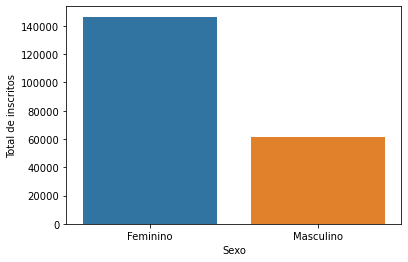

In [185]:
sexo = dataset_clean['Sexo'].value_counts().reset_index()
sexo.columns = ['Sexo', 'Total de inscritos']
sns.barplot(data = sexo, x=sexo['Sexo'], y='Total de inscritos')

<AxesSubplot:xlabel='Etnia/Cor', ylabel='Total de inscritos'>

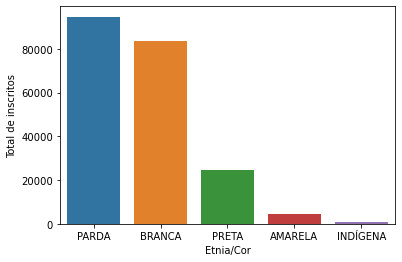

In [186]:
etnia = dataset_clean['Etnia/Cor'].value_counts().reset_index()
etnia.columns = ['Etnia/Cor', 'Total de inscritos']
sns.barplot(data = etnia, x=etnia['Etnia/Cor'], y='Total de inscritos')

<AxesSubplot:xlabel='Pessoa com deficiência?', ylabel='Total de inscritos'>

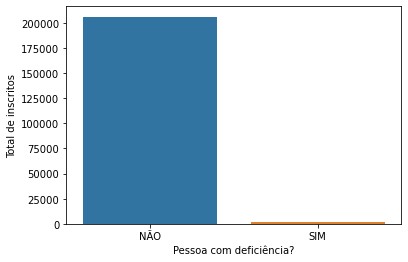

In [187]:
pessoa = dataset_clean['Pessoa com deficiência?'].value_counts().reset_index()
pessoa.columns = ['Pessoa com deficiência?', 'Total de inscritos']
sns.barplot(data = pessoa, x=pessoa['Pessoa com deficiência?'], y='Total de inscritos')

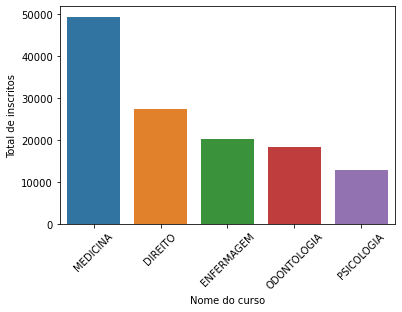

In [188]:
cursos =dataset_clean['Nome do curso'].value_counts().reset_index()
cursos.columns = ['Nome do curso', 'Total de inscritos']
sns.barplot(data=cursos.sort_values('Total de inscritos', ascending=False)[0:5], x=cursos['Nome do curso'][0:5], y=cursos['Total de inscritos'])
plt.xticks(rotation=45);


Podemos notar que o curso de medicina é disparado a graduação mais procurada para financiamento estudantil.

<AxesSubplot:xlabel='Turno', ylabel='Total de inscritos'>

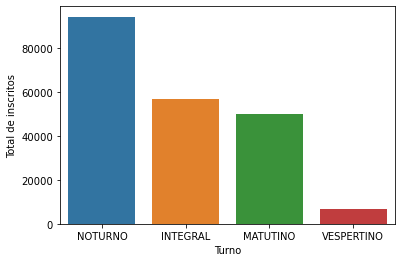

In [189]:
turno = dataset_clean['Turno'].value_counts().reset_index()
turno.columns = ['Turno', 'Total de inscritos']
sns.barplot(data = turno, x=turno['Turno'], y='Total de inscritos')

## Dados numéricos

1. Renda familiar mensal bruta: É a renda bruta total da familia por mês.
2. Renda mensa bruta per capita: Renda familiar mensal bruta/N° de pessoas na familia 

O cálculo de renda familiar bruta per capita é o maior critério para seleção dos candidados aos programas de bolsas de estudo para o ensino superior ofertadas pelo governo federal.

Para o FIES, por exemplo, o candidato precisa ter uma renda familiar bruta per capita até 1,5 do salário minímo para conseguir se candidatar ao financiamento com juros zero.

E como funciona o cálculo?

De forma simples, pega a renda bruta total da familia e divide pelo número de membros da família.

Exemplo: A renda bruta do de um pai de família é 3 mil reais e junto com ele moram mais dois filhos, logo a renda familiar bruta per capita é igual mil reais por pessoa.

In [190]:
dataset_clean.columns

Index(['Sexo', 'Etnia/Cor', 'Pessoa com deficiência?',
       'Tipo de escola no ensino médio', 'Renda familiar mensal bruta',
       'Renda mensal bruta per capita', 'Nome do curso', 'Turno',
       'Média nota Enem', 'Situação Inscrição Fies'],
      dtype='object')

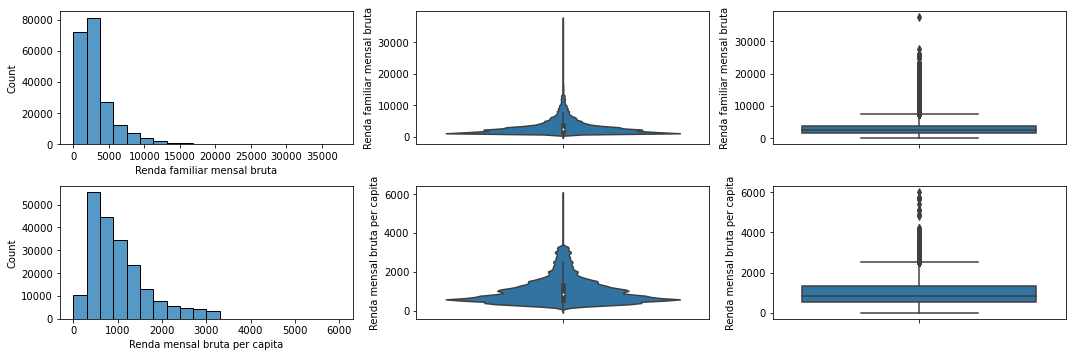

In [191]:
fig,axes = plt.subplots(2,3,figsize=(15,5))
sns.histplot(ax=axes[0][0],data=dataset_clean, x='Renda familiar mensal bruta',bins=20)
sns.violinplot(ax=axes[0][1],y=dataset_clean['Renda familiar mensal bruta'])
sns.boxplot(ax=axes[0][2], y=dataset_clean['Renda familiar mensal bruta'])

sns.histplot(ax=axes[1][0],data=dataset_clean, x='Renda mensal bruta per capita',bins=20)
sns.violinplot(ax=axes[1][1],y=dataset_clean['Renda mensal bruta per capita'])
sns.boxplot(ax=axes[1][2], y=dataset_clean['Renda mensal bruta per capita'])


plt.tight_layout()


Podemos notar que tanto da **Renda familiar mensal bruta** quanto da **Renda mensal bruta per capita** possuem distribuções assimétricas positivas, ou seja, apesar de termos valores discrepantes de Renda ainda sim temos uma maior concentração de inscritos que possuem:

- **Renda familiar mensal bruta** na faixa de 0 e 4 mil reais.

- **Renda mensal bruta per capita** na faixa 0 a 1500 reais.

E por ter uma assimetria positiva mediana < média

In [192]:
dataset_clean[['Renda familiar mensal bruta','Renda mensal bruta per capita']].describe().T

,count,mean,std,min,25%,50%,75%,max
Renda familiar mensal bruta,207690.0,3194.675817,2476.989048,0.0,1500.0,2400.0,3900.00,37461.46
Renda mensal bruta per capita,207690.0,1042.332877,668.563330,0.0,550.0,850.0,1333.33,6000.19


Agora, podemos confirmar que para:

1. **Renda familiar mensal bruta** 50% dos dados estão abaixo de R$ 2400,0 e 50% estão acima
2. **Renda mensal bruta per capita** 50% dos dados estão abaixo de 850,0 e 50% estão acima

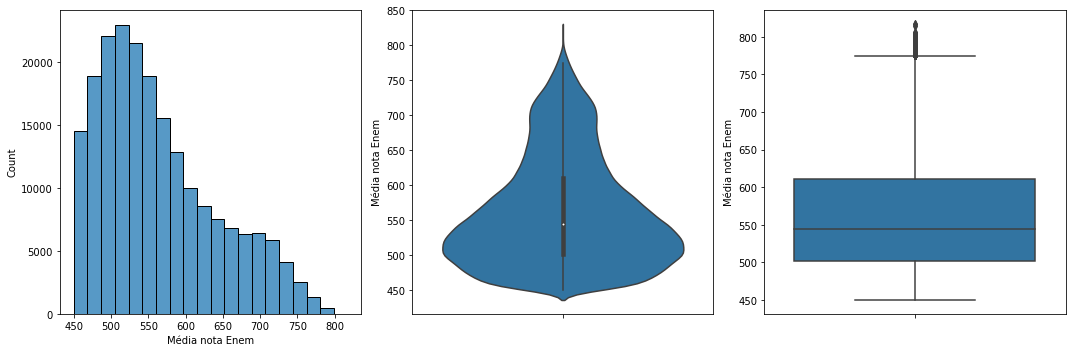

In [193]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
sns.histplot(ax=axes[0],data=dataset_clean, x='Média nota Enem',bins=20)
sns.violinplot(ax=axes[1],y=dataset_clean['Média nota Enem'])
sns.boxplot(ax=axes[2], y=dataset_clean['Média nota Enem'])
plt.tight_layout()

As notas do enem também aprensentam uma mediana menor que a média, resultando também em uma assimetria positiva com uma concentração maior das médias de notas do ENEM em torno de 500 - 550 pontos.

Muito poucas pessoas que solicitam a inscrição do FIES possuem a média de nota do ENEM acima de 750 pontos.

In [194]:
salario_minimo_2021 = 1212
dataset_clean['Salário minímo mensal bruta per capita'] = dataset_clean['Renda mensal bruta per capita'].apply(lambda x: x/salario_minimo_2021);

C:\Users\nrodr\AppData\Local\Temp\ipykernel_11700\3964459367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean['Salário minímo mensal bruta per capita'] = dataset_clean['Renda mensal bruta per capita'].apply(lambda x: x/salario_minimo_2021);


Como o parâmetro para conseguir o FIES é de até 1,5 salário minímo bruto per capita, o código acima foi necessário para criar uma nova coluna no meu data set e assim atribuindo a ela o cálculo realizado.

A função apply serve para quando queremos aplicar uma função em uma determinada coluna, que no nosso caso é a feature *Renda mensal bruta per capita*, e a função anônima lambda realiza o cálculo necessário em cada linha dessa coluna com base no [salário minímo de 2021](https://www.camara.leg.br/noticias/842657-medida-provisoria-estabelece-salario-minimo-de-r-1-212-novo-valor-ja-esta-em-vigor/#:~:text=Come%C3%A7ou%20a%20valer%20no%20s%C3%A1bado,assinada%20pelo%20presidente%20Jair%20Bolsonaro.), retornando como resultado o salário minímo per capita de cada pessoa que realizoua  inscrição no FIES em 2021.

In [195]:
dataset_clean.head()

,Sexo,Etnia/Cor,Pessoa com deficiência?,Tipo de escola no ensino médio,Renda familiar mensal bruta,Renda mensal bruta per capita,Nome do curso,Turno,Média nota Enem,Situação Inscrição Fies,Salário minímo mensal bruta per capita
0,Masculino,PARDA,NÃO,SIM,4253.03,1417.68,DIREITO,NOTURNO,624.10,NÃO CONTRATADO,1.169703
1,Masculino,PARDA,NÃO,SIM,4253.03,1417.68,DIREITO,MATUTINO,624.10,NÃO CONTRATADO,1.169703
3,Masculino,BRANCA,NÃO,SIM,1574.07,787.04,DIREITO,MATUTINO,598.54,OPÇÃO NÃO CONTRATADA,0.649373
4,Feminino,BRANCA,NÃO,SIM,2500.00,833.33,DIREITO,NOTURNO,512.16,NÃO CONTRATADO,0.687566
5,Feminino,BRANCA,NÃO,SIM,2500.00,833.33,DIREITO,MATUTINO,512.16,NÃO CONTRATADO,0.687566


### E como será a distribuição de renda bruta per capita de acordo com o Sexo da pessoa?

<AxesSubplot:xlabel='Média nota Enem', ylabel='Proportion'>

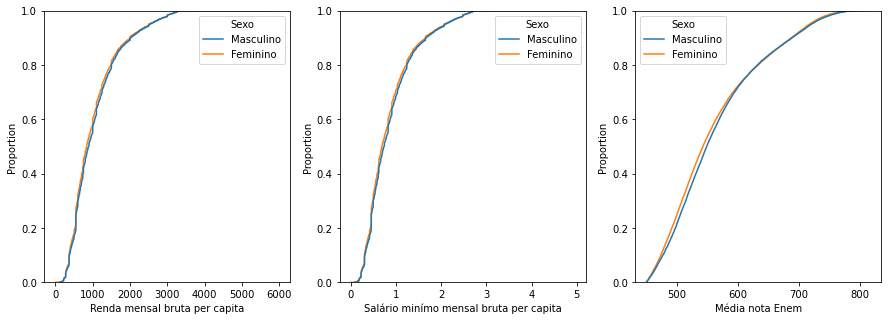

In [196]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
sns.ecdfplot(ax=axes[0],data=dataset_clean, x="Renda mensal bruta per capita", hue="Sexo")
sns.ecdfplot(ax=axes[1],data=dataset_clean, x="Salário minímo mensal bruta per capita", hue="Sexo")
sns.ecdfplot(ax=axes[2],data=dataset_clean, x="Média nota Enem", hue="Sexo")


### E a distribuição de nota e renda de acordo com a Etnia/Cor do candidato?

<AxesSubplot:xlabel='Média nota Enem', ylabel='Proportion'>

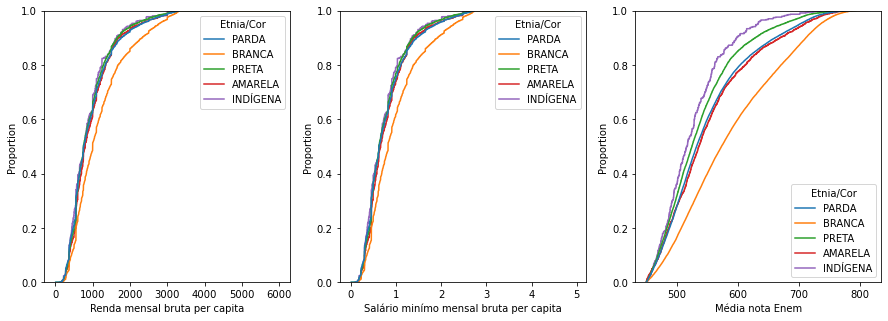

In [197]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
sns.ecdfplot(ax=axes[0],data=dataset_clean, x="Renda mensal bruta per capita", hue="Etnia/Cor")
sns.ecdfplot(ax=axes[1],data=dataset_clean, x="Salário minímo mensal bruta per capita", hue="Etnia/Cor")
sns.ecdfplot(ax=axes[2],data=dataset_clean, x="Média nota Enem", hue="Etnia/Cor")


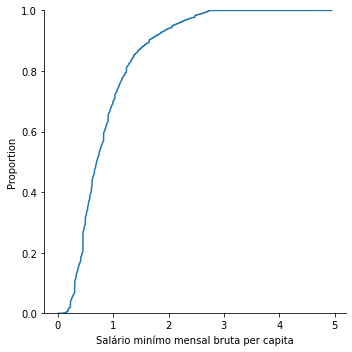

In [198]:
sns.displot(data=dataset_clean, x='Salário minímo mensal bruta per capita', kind='ecdf')

Podemos notar que em torno de 86% possuem renda familiar bruta per capita de até 1.5 salário minímo, e assim, se enquadrando no critério para conseguir o financiamento estudantil.

### E dos elegíveis para o financiamento com juros zero, qual a proporção de contratos realizados?

In [222]:
elegivel = dataset_clean.loc[dataset_clean['Salário minímo mensal bruta per capita'] <= 1.5]
contratada =(elegivel.loc[elegivel['Situação Inscrição Fies'] == 'CONTRATADA'].shape[0]/elegivel.shape[0])*100
print(f'A porcentagem de canditados elegíveis para o programa e que realmente contrataram o serviço é {contratada:.2f}%')

A porcentagem de canditados elegíveis para o programa e que realmente contrataram o serviço é 10.79%


# Qua a porcentagem de contratos fechados de acordo com etnia/cor e sexo?

In [228]:
contrato_fechado = elegivel.loc[elegivel['Situação Inscrição Fies'] == 'CONTRATADA']

In [234]:
masc = (contrato_fechado.loc[contrato_fechado['Sexo'] == 'Masculino'].shape[0]/contrato_fechado.shape[0])*100
fem = (contrato_fechado.loc[contrato_fechado['Sexo'] == 'Feminino'].shape[0]/contrato_fechado.shape[0])*100

In [245]:
mulheres = contrato_fechado.loc[contrato_fechado['Sexo'] == 'Feminino']
preferencia_fem = mulheres.groupby('Nome do curso').size().reset_index()
preferencia_fem.columns = ['Nome do Curso', 'Total']
preferencia_fem.sort_values('Total', ascending=False)[0:5]

,Nome do Curso,Total
84,ODONTOLOGIA,2497
35,DIREITO,2427
37,ENFERMAGEM,2067
91,PSICOLOGIA,1385
60,FISIOTERAPIA,1002


In [235]:
print(f'Das 87% pessoas elegíveis para o programa, e {contratada:.2f}% que realmente contrataram o serviço, {fem:.2f}% são mulheres e {masc:.2f}% são homens')

Das 87% pessoas elegíveis para o programa, e 10.79% que realmente contrataram o serviço, 70.69% são mulheres e 29.31% são homens


# Conclusões


- Apesar de 87% das pessoas serem elegíveis para o programa, apenas 10,79% realmente realizam o contrato do Financiamento. Um das possibilidades para isso ocorrer é o valor da parcela do financiamento já que a mediana da renda bruta per capita por pessoa da familia é R$850,0 e maior procura dos candidados disparadamento são os cursos de Medicina, que costumam ter uma mensalidade alta. 

- Notamos também que há uma procura muito maior por parte das mulheres pelo Financiamento estudantil, e representam 70,79% dos candidados que realmente fecharam o contrato do financiamento. 

- Os cursos de Odontologia, Direito, Enfermagem, Psicologia e Fisioterapia são os cursos com maior número de financiamentos realizados pelas mulheres.

- Pessoa com Etnia/Cor branca tem as maiores médias de nota do Enem e as maiores rendas entre os inscritos para o FIES no ano de 2021